<a href="https://colab.research.google.com/github/CaioEnzo23/Construindo-um-modelo-de-Regress-o-para-marketing/blob/main/Desafio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

Instalação das bibliotecas

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.5 MB/s eta 0:00:00


Importação das principais bilbiotecas ultilizadas

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
MKT_Dados = pd.read_csv("/content/drive/MyDrive/Colab - Desafio 4/MKT.csv")

# **Análise Descritiva**

Visualização dos dados da empresa

In [ ]:
MKT_Dados.head()

,youtube,facebook,newspaper,sales
0,84,19,48,12
1,351,33,51,25
2,135,20,46,14
3,116,1,36,11
4,318,24,0,20


Visualização dos tipos de dados

In [ ]:
MKT_Dados.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

Alteração dos Tipos de dados

In [ ]:
MKT_Dados = MKT_Dados.astype({"youtube":"int", "facebook":"int", "newspaper":"int", "sales":"int"})
MKT_Dados.dtypes

youtube      int64
facebook     int64
newspaper    int64
sales        int64
dtype: object

Visualização das informações dos dados

In [ ]:
MKT_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   youtube    171 non-null    int64
 1   facebook   171 non-null    int64
 2   newspaper  171 non-null    int64
 3   sales      171 non-null    int64
dtypes: int64(4)
memory usage: 5.5 KB


Ultilização da função "describe"

In [ ]:
MKT_Dados[["youtube","facebook","newspaper","sales"]].describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,177.549708,27.198830,34.754386,16.438596
std,102.463719,17.938988,24.896927,6.322744
min,0.000000,0.000000,0.000000,1.000000
25%,90.500000,11.000000,13.500000,12.000000
50%,179.000000,26.000000,31.000000,15.000000
75%,262.500000,43.000000,50.500000,20.000000
max,355.000000,59.000000,121.000000,32.000000


# **Análise Exploratória**

Grafico de correlação Youtube X Vendas

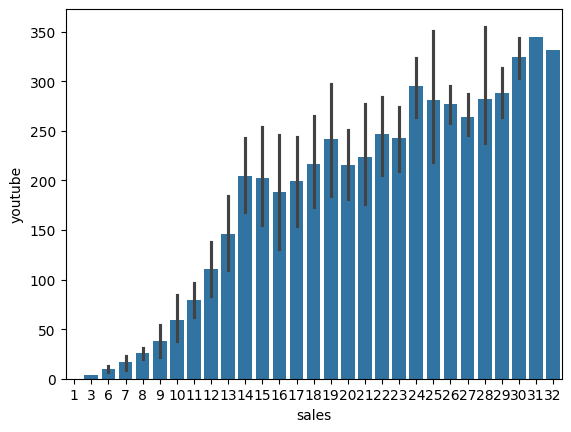

In [ ]:
ax = sns.barplot(data=MKT_Dados,x="sales",y="youtube");

Grafico de correlação Facebook X Vendas

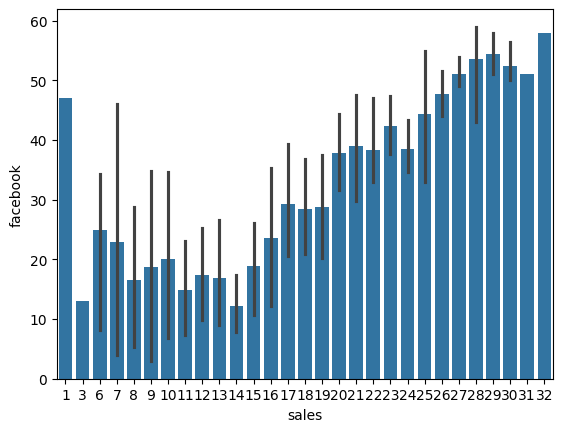

In [ ]:
ax = sns.barplot(data=MKT_Dados,x="sales",y="facebook");

Grafica de correlação Newspaper X Vendas

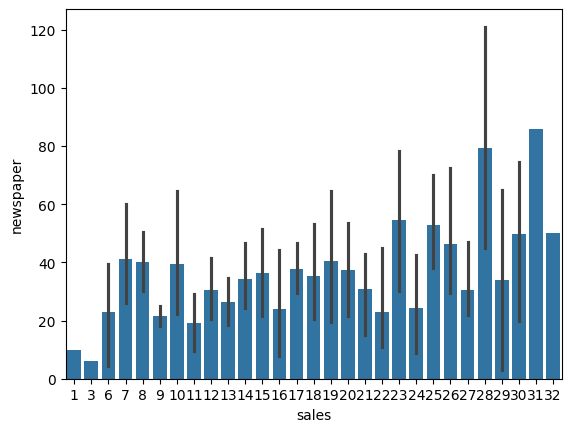

In [ ]:
ax = sns.barplot(data=MKT_Dados,x="sales",y="newspaper");

Grafica de correlação Youtube, Facebook e Newspaper X Vendas

In [ ]:
df = pd.DataFrame(MKT_Dados)

In [ ]:
df_long = pd.melt(df, id_vars=['sales'], value_vars=['newspaper', 'facebook', 'youtube'],
                  var_name='channel', value_name='value')

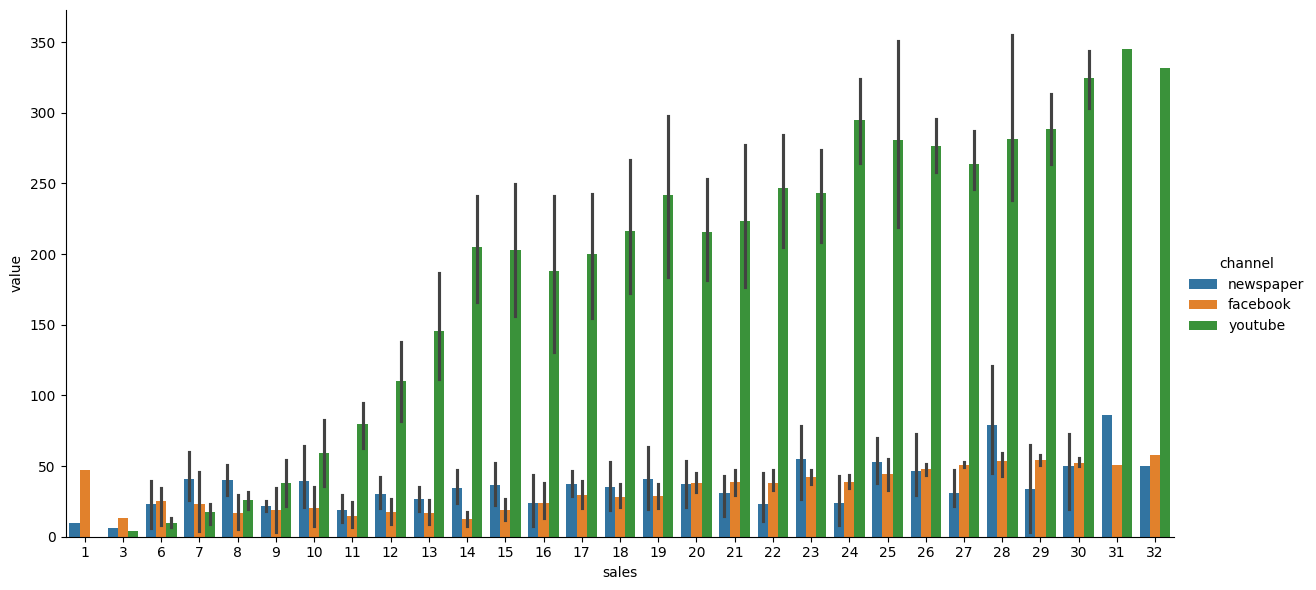

In [ ]:
sns.catplot(data=df_long, x='sales', y='value', hue='channel', kind='bar', height=6, aspect=2)

In [ ]:
agg_sales = MKT_Dados[["sales"]]

In [ ]:
agg_sales.describe()

,sales
count,171.000000
mean,16.438596
std,6.322744
min,1.000000
25%,12.000000
50%,15.000000
75%,20.000000
max,32.000000


Histograma de Vendas

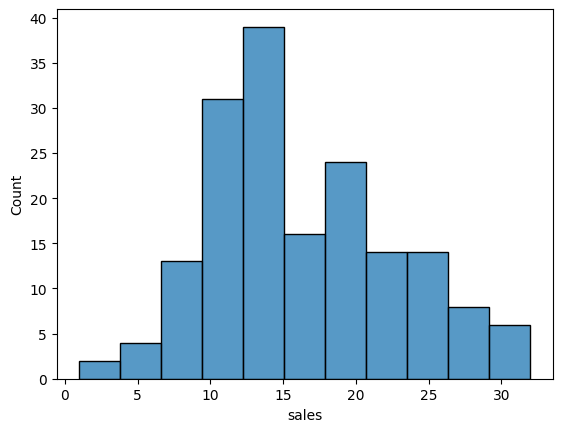

In [ ]:
sns.histplot(data = MKT_Dados, x = "sales");

Grafico de correlação detalhado usando fig Youtube, Facebook, Newspaper X Vendas

In [ ]:
df = pd.DataFrame(MKT_Dados)

In [ ]:
df_long = pd.melt(df, id_vars=['sales'], value_vars=['newspaper', 'facebook', 'youtube'],
                  var_name='channel', value_name='value')


In [ ]:
fig = px.bar(df_long, x='sales', y='value', color='channel', barmode='group')

In [ ]:
fig.show()

# **Modelagem**

Gráfico de Regreção

In [ ]:
fig = px.box(MKT_Dados, x = "sales")
fig.update_traces(line_color="blue")

Gráficos de Correlação da base de dados

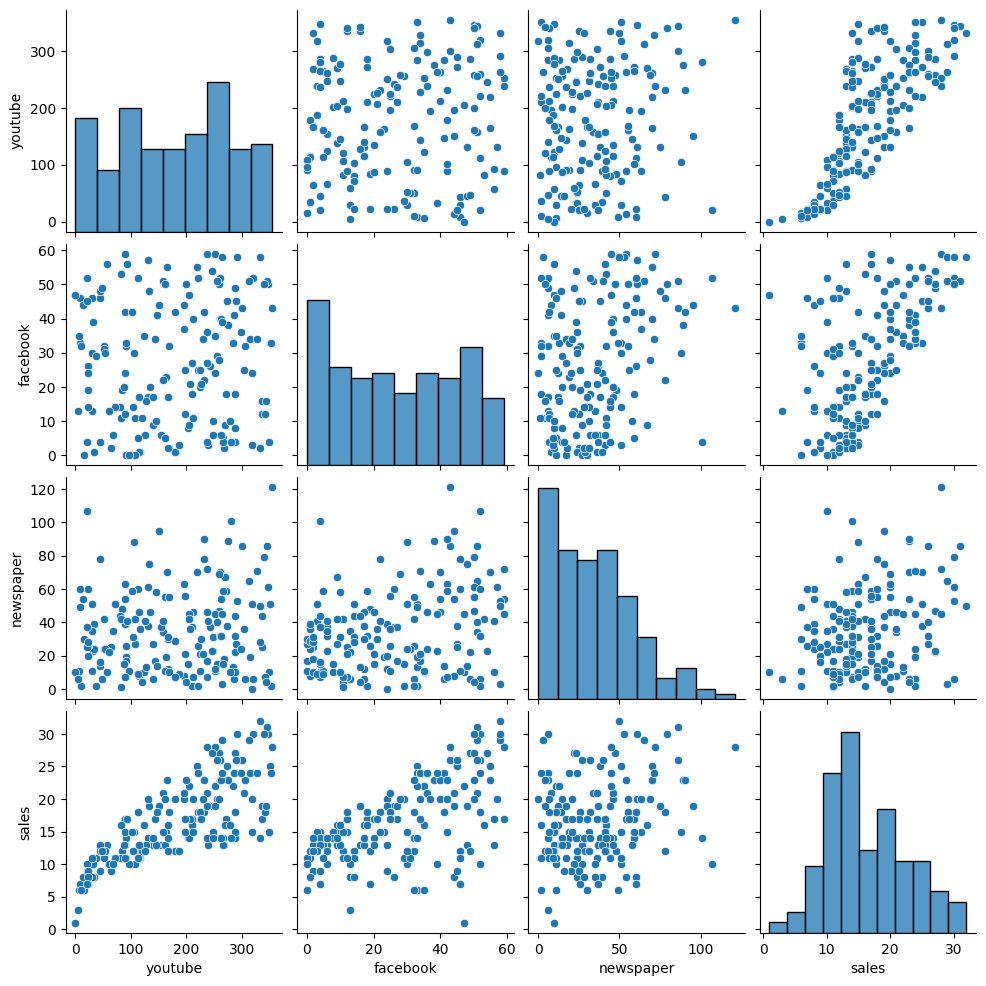

In [ ]:
sns.pairplot(MKT_Dados)

Graficos de Comparação em relação as Vendas

In [ ]:
MKT_Dados.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

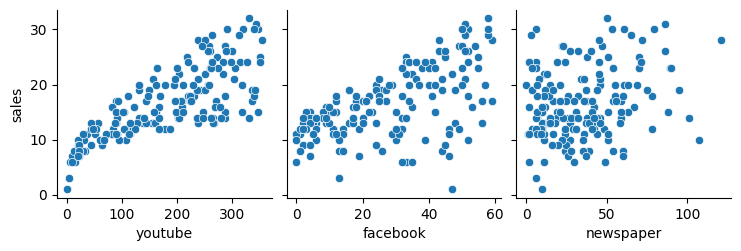

In [ ]:
sns.pairplot(MKT_Dados, x_vars=['youtube', 'facebook', 'newspaper'], y_vars="sales")

Correlação dos Dados

In [ ]:
MKT_Dados.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.085630,0.111514,0.781849
facebook,0.085630,1.000000,0.295067,0.598282
newspaper,0.111514,0.295067,1.000000,0.260994
sales,0.781849,0.598282,0.260994,1.000000


Correlação em Gráfico

<Axes: >

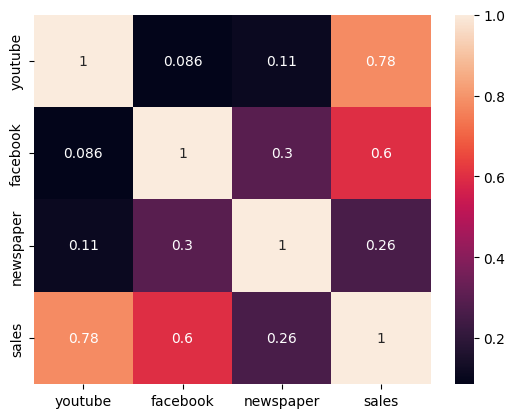

In [ ]:
sns.heatmap(MKT_Dados.corr(), annot =True)

Distribuição das Vendas

<Axes: xlabel='sales', ylabel='Count'>

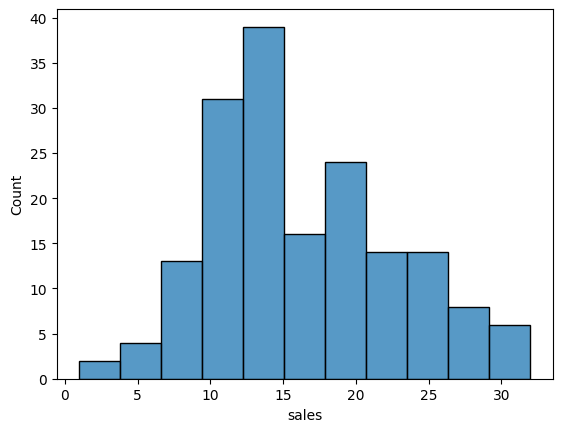

In [ ]:
sns.histplot(MKT_Dados["sales"])

Tamanho dos Dados por Coluna

In [ ]:
MKT_Dados.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [ ]:
x = MKT_Dados[['youtube', 'facebook', 'newspaper']]

y = MKT_Dados[["sales"]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7,test_size = 0.3, random_state= 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


# **Calculando predição**

In [ ]:
Margem de acerto da predição

Gráfico de Linha em Predição

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)

In [ ]:
print("r_quadrado:",r)

r_quadrado: 0.8790791824986407


Gráfico de Linha em Predição

Text(0, 0.5, 'vendas')

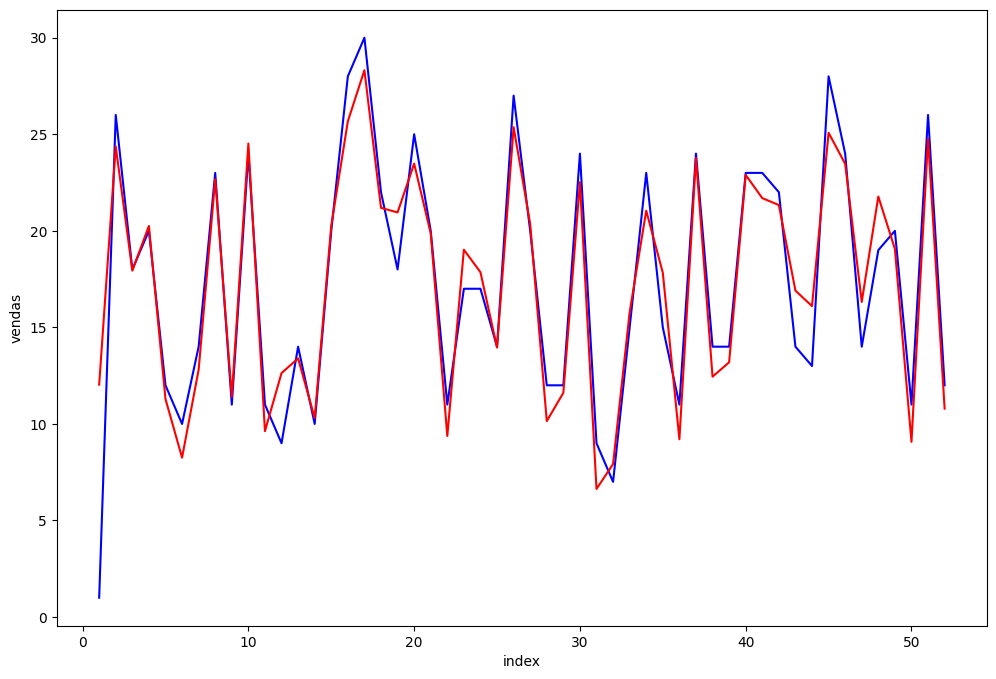

In [ ]:
c = [i for i in range(1, 1501, 1)]
fig = plt.figure(figsize=(12,8))
plt.plot(c[:len(y_test)], y_test, color = "blue")
plt.plot(c[:len(y_pred)], y_pred, color = "red")
plt.xlabel("index")
plt.ylabel("vendas")

Predição Manual

In [ ]:
youtube = 50
facebook = 30
newspaper = 7
entrada = [[youtube,facebook,newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([11.14662782])